You can get the dataset from https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

Import packages


In [27]:
import numpy as np
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import sys
import cv2



Reading the images

In [2]:
tumor = []
path ="/home/biddy/Desktop/t_MRI/brain_tumor_dataset/yes/*.jpg"
paths ="/home/biddy/Desktop/t_MRI/brain_tumor_dataset/yes/*.JPG"
for image in glob.iglob(path):
    img = cv2.imread(image)
    img = cv2.resize(img,(128,128))
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)
for i in glob.iglob(paths):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128))
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)
len(tumor)




154

In [3]:
for ima in tumor:
    print(ima.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [4]:
healthy = []
path = "/home/biddy/Desktop/t_MRI/brain_tumor_dataset/no/*.jpg"
paths = "/home/biddy/Desktop/t_MRI/brain_tumor_dataset/no/*.JPG"
for image in glob.iglob(path):
    img =cv2.imread(image)
    img =cv2.resize(img,(128,128))
    b,r,g = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)
for i in glob.iglob(paths):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128))
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)
len(healthy)


91

In [5]:
healthy = np.array(healthy)
tumor = np.array(tumor)
all = np.concatenate((healthy,tumor))
all.shape

(245, 128, 128, 3)

Visualization Brain MRI Images

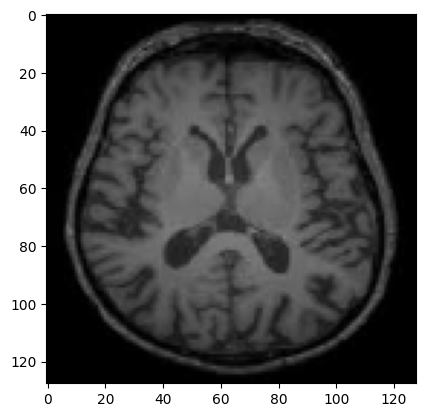

In [7]:
plt.imshow(healthy[0])

In [6]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i+1)
        plt.title("healthy")
        plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i+1)
        plt.title("tumor")
        plt.imshow(tumor_imgs[i])
  






In [ ]:
plot_random(healthy, tumor)

Create Torch Dataset class


Creating MRI custom Dataset Class

In [4]:
class MRI(Dataset):
    def __init__(self):
        healthy = []
        path = "/home/biddy/Desktop/t_MRI/brain_tumor_dataset/no/*.jpg"
        paths = "/home/biddy/Desktop/t_MRI/brain_tumor_dataset/no/*.JPG"
        for image in glob.iglob(path):
            img =cv2.imread(image)
            img =cv2.resize(img,(128,128))
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape(img.shape[2],img.shape[0],img.shape[1])
            healthy.append(img)
        for i in glob.iglob(paths):
            img = cv2.imread(i)
            img = cv2.resize(img,(128,128))
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape(img.shape[2],img.shape[0],img.shape[1])
            healthy.append(img)

        tumor = []
        path ="/home/biddy/Desktop/t_MRI/brain_tumor_dataset/yes/*.jpg"
        paths ="/home/biddy/Desktop/t_MRI/brain_tumor_dataset/yes/*.JPG"
        for image in glob.iglob(path):
            img = cv2.imread(image)
            img = cv2.resize(img,(128,128))
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape(img.shape[2],img.shape[0],img.shape[1])
            tumor.append(img)
        for i in glob.iglob(paths):
            img = cv2.imread(i)
            img = cv2.resize(img,(128,128))
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape(img.shape[2],img.shape[0],img.shape[1])
            tumor.append(img)

#            Our Images
        tumor = np.array(tumor,dtype=np.float32)
        healthy = np.array(healthy,dtype=np.float32)

# Our Ground lables
        tumor_label = np.ones(tumor.shape[0],dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0],dtype=np.float32)

 #concatenate
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))


    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index):
        sample ={"image":self.images[index], "label": self.labels[index]}
        return sample

    def normalize(self):
        self.images = self.images/255.0


In [5]:
mri =MRI()

In [9]:
len(mri)

245

In [6]:
mri.normalize()

Create A dataloader(manual)

In [ ]:
index = list(range(len(mri)))
random.shuffle(index)
for idx in index:
    sample = mri[idx]
    img = sample["image"]
    label = sample["label"]
    img = img.reshape(img.shape[1], img.shape[2], img.shape[0])
    plt.title(label)
    plt.imshow(img)
    plt.show()

In [ ]:
it = iter(mri)
for i in range(10):
    sample = next(it)
    img = sample["image"]
    label = sample["label"]
    img = img.reshape(img.shape[1], img.shape[2], img.shape[0])
    plt.title(label)
    plt.imshow(img)
    plt.show()


WIth Torch Dataloader

In [12]:
dataloader = DataLoader(mri,batch_size=10, shuffle=True)


In [15]:
for sample in dataloader:
    img = sample["image"].squeeze()
    img = img.reshape(img.shape[1], img.shape[2], img.shape[0])
    plt.imshow(img)
    plt.show()

    print(img.shape)
    sys.exit()

RuntimeError: shape '[3, 128, 10]' is invalid for input of size 491520

Create Model

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5)
        )

        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0),-1)
        x = self.fc_model(x)
        x = F.sigmoid(x)

        return x


Evaluate a New-Born Neural Network

In [9]:
mri_dataset = MRI()
mri_dataset.normalize()
model = CNN()

In [10]:
dataloader = DataLoader(mri_dataset, batch_size = 32, shuffle = False)

In [11]:
model.eval()
outputs = []
y_true = []

with torch.no_grad():
    for  D in dataloader:
        image = D["image"]
        label = D["label"]


        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())


In [12]:
outputs = np.concatenate(outputs, axis = 0). squeeze()
y_true = np.concatenate(y_true, axis = 0).squeeze()

In [13]:
def threshold(scores, threshold= 0.50, minimum = 0, maximum=1.0):
    x= np.array(list(scores))
    x[x >= threshold] = maximum
    x[x< threshold] = minimum
    return x

In [14]:
accuracy_score(y_true, threshold(outputs))


0.37142857142857144

Train New-Born Convolutional Neural Network

In [15]:
eta = 0.001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(),lr=eta)
dataloader = DataLoader(mri_dataset, batch_size = 32, shuffle = True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [ ]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D["image"]
        label = D["label"]
        y_hat = model(data)
        #define loss function
        error = nn.BCELoss()
        loss= torch.sum(error(y_hat.squeeze(),label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1)% 10==0:
        print("Train Epoch:{}loss:{:.6f}".format(epoch+1, np.mean(losses)))
        

In [21]:
model.eval()
outputs = []
y_true = []

with torch.no_grad():
    for  D in dataloader:
        image = D["image"]
        label = D["label"]


        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

outputs = np.concatenate(outputs, axis = 0). squeeze()
y_true = np.concatenate(y_true, axis = 0).squeeze()

In [22]:
accuracy_score(y_true, threshold(outputs))

1.0

In [ ]:
cm = confusion_matrix(y_true, threshold(outputs))
plt.figure(figsize=(16,9))
ax = plt.subplot()
sns.heatmap(cm, annot= True, fmt="g", ax=ax);
ax.set_xlabel("Predicted labels"); ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.axis.set_ticklabels(["Tumor", "Healthy"])
ax.yxis.set_ticklabels(["Tumor", "Healthy"])


Visualizing the Feature Maps of Maps of the convolutional filters